# Análise de Dados da Universidade Federal do Rio Grande do Norte (UFRN)

Equipe: Henrique David de Medeiros (henriquemed101@gmail.com), Lucas Gabriel Matias Paiva (lucasgmpaiva1@gmail.com) e Robert Bleda de Saint George (saintgeorge@uol.com.br)

**1.0 - Objetivo**

   O Presente trabalho tem como objetivo fazer uma análise dos dados dos alunos matriculados no curso de Bacharelado de Tecnologia da Informação - BTI da Universidade Federal do Rio Grande do Norte, no periodo de 2014.1 a 2017.1. A partir dos dados disponibilizados pela universidade, está análise pretende mostrar o comportamento do perfil socio economico dos alunos, levando-se em conta a origem de suas formações anteriores à universidade, escola pública, particular ou mista, a faixa de renda declarada. Estabelecer um comparativo destes fatores com seus desempenhos universitários.
   
   Queremos verificar se estes fatores, de alguma forma, influencia os rendimentos acadêmicos, e em caso positivo o tamanho deste impácto. Além disto pretendemos analizar a tendencia do perfil socio economico num período fortemente impactante pelos fatos políticos que tém afetado o país.


In [1]:
#Bibliotecas Necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import arange

In [2]:
#Criando DataFrames de Socioeconômico

dadosSocio_2017_1 = pd.read_csv("https://bit.ly/2jLOb0T", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_2 = pd.read_csv("https://bit.ly/2K8jMF3", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_1 = pd.read_csv("https://bit.ly/2I5xrMA", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_2 = pd.read_csv("https://bit.ly/2K7UtTy", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_1 = pd.read_csv("https://bit.ly/2wuf4PY", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_2 = pd.read_csv("https://bit.ly/2IaMcO9", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_1 = pd.read_csv("https://bit.ly/2rwzbXX", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);


In [3]:
#Criando DataFrames de Situações

dadosSituacao_2017_1 = pd.read_csv("https://bit.ly/2KMoTvS", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_2 = pd.read_csv("data/matriculas-de-2016.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_1 = pd.read_csv("data/matriculas-de-2016.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_2 = pd.read_csv("data/matriculas-de-2015.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_1 = pd.read_csv("data/matriculas-de-2015.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_2 = pd.read_csv("data/matricula-componente-20142.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_1 = pd.read_csv("data/matricula-componente-20141.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);

In [4]:
#Preparando Os Dados
lista_Socio = [dadosSocio_2014_1, dadosSocio_2014_2, dadosSocio_2015_1, dadosSocio_2015_2, dadosSocio_2016_1, dadosSocio_2016_2, dadosSocio_2017_1]

for data in lista_Socio:
  data.rename(columns={"id_discente" : "discente"}, inplace=True)
  
dadosSocio_2017_1.columns

Index(['discente', 'ano', 'periodo', 'renda', 'escola_ens_medio'], dtype='object')

In [5]:
# Obter dados apenas do IMD.

dadosSituacao_2017_1 = dadosSituacao_2017_1[dadosSituacao_2017_1.id_curso==92127264]
dadosSituacao_2016_2 = dadosSituacao_2016_2[dadosSituacao_2016_2.id_curso==92127264]
dadosSituacao_2016_1 = dadosSituacao_2016_1[dadosSituacao_2016_1.id_curso==92127264]
dadosSituacao_2015_2 = dadosSituacao_2015_2[dadosSituacao_2015_2.id_curso==92127264]
dadosSituacao_2015_1 = dadosSituacao_2015_1[dadosSituacao_2015_1.id_curso==92127264]
dadosSituacao_2014_2 = dadosSituacao_2014_2[dadosSituacao_2014_2.id_curso==92127264]
dadosSituacao_2014_1 = dadosSituacao_2014_1[dadosSituacao_2014_1.id_curso==92127264]

In [6]:
#Unindo Dados De Cada Período

dados_2017_1 = pd.merge(dadosSocio_2017_1, dadosSituacao_2017_1, on='discente')
dados_2016_2 = pd.merge(dadosSocio_2016_2, dadosSituacao_2016_2, on='discente')
dados_2016_1 = pd.merge(dadosSocio_2016_1, dadosSituacao_2016_1, on='discente')
dados_2015_2 = pd.merge(dadosSocio_2015_2, dadosSituacao_2015_2, on='discente')
dados_2015_1 = pd.merge(dadosSocio_2015_1, dadosSituacao_2015_1, on='discente')
dados_2014_2 = pd.merge(dadosSocio_2014_2, dadosSituacao_2014_2, on='discente')
dados_2014_1 = pd.merge(dadosSocio_2014_1, dadosSituacao_2014_1, on='discente')

dados_2017_1 = dados_2017_1[~dados_2017_1.discente.duplicated()]
dados_2016_2 = dados_2016_2[~dados_2016_2.discente.duplicated()]
dados_2016_1 = dados_2016_1[~dados_2016_1.discente.duplicated()]
dados_2015_2 = dados_2015_2[~dados_2015_2.discente.duplicated()]
dados_2015_1 = dados_2015_1[~dados_2015_1.discente.duplicated()]
dados_2014_2 = dados_2014_2[~dados_2014_2.discente.duplicated()]
dados_2014_1 = dados_2014_1[~dados_2014_1.discente.duplicated()]

lista_Dados = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for data in lista_Dados:
  data.dropna()
  
dados_2017_1.reset_index(drop=True, inplace=True)
dados_2016_2.reset_index(drop=True, inplace=True)
dados_2016_1.reset_index(drop=True, inplace=True)
dados_2015_2.reset_index(drop=True, inplace=True)
dados_2015_1.reset_index(drop=True, inplace=True)
dados_2014_2.reset_index(drop=True, inplace=True)
dados_2014_1.reset_index(drop=True, inplace=True)

In [44]:
dados_2016_1.pivot_table(index = ['escola_ens_medio', 'descricao'], values=['discente'], aggfunc='count')

discente
escola_ens_medio                                   descricao                                 
Em escola Particular, com bolsa                    APROVADO                                 2
                                                   APROVADO POR NOTA                        7
                                                   INDEFERIDO                               2
                                                   REPROVADO                                1
                                                   REPROVADO POR MÉDIA E POR FALTAS         2
                                                   TRANCADO                                 1
Outro tipo de escola                               CANCELADO                                1
                                                   REPROVADO                                1
Parte em escola pública parte em escola particu... APROVADO                                 2
                                                   APROVADO POR NOTA                        3
                                                   CANCELADO                                1
                                                   INDEFERIDO                               1
                                                   REPROVADO                                1
Todo em escola particular                          APROVADO                                14
                                                   APROVADO POR NOTA                       27
                                                   CANCELADO                               10
                                                   DESISTENCIA                              2
                                                   EXCLUIDA                                 3
                                                   INDEFERIDO                               2
                                                   REPROVADO                               10
                                                   REPROVADO POR MÉDIA E POR FALTAS         5
                                                   REPROVADO POR NOTA                       1
                                                   TRANCADO                                 2
Todo em escola publica                             APROVADO                                36
                                                   APROVADO POR NOTA                       43
                                                   CANCELADO                               15
                                                   DESISTENCIA                              3
                                                   EXCLUIDA                                 6
                                                   INDEFERIDO                               7
                                                   REPROVADO                               29
                                                   REPROVADO POR MÉDIA E POR FALTAS        12
                                                   REPROVADO POR NOTA                       1
                                                   TRANCADO                                 4

In [8]:
# Atribui a cada discente uma classe

dados_gerais = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for i in dados_gerais:
    i["classe"] = pd.cut(i["renda"],
       bins=[714,1024,1541,2565,4418,8418,12926, 27500],
      labels=["D","C2","C1","B2","B1","A2", "A1"],
      include_lowest=True)
    
# Classe A1 < 27500
# Classe A2 < 12926
# Classe B1 < 8418
# Classe B2 < 4415
# Classe C1 < 2565
# Classe C2 < 1024
# Classe D < 714

In [9]:
classes = dados_2017_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes.columns = ['20171']
classes["20162"] = dados_2016_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20161"] = dados_2016_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20152"] = dados_2015_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20151"] = dados_2015_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20142"] = dados_2014_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20141"] = dados_2014_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')

classes = classes.transpose()

In [378]:
dados_2017_1.columns

Index(['discente', 'ano', 'periodo', 'renda', 'escola_ens_medio', 'id_curso',
       'media_final', 'descricao', 'classe'],
      dtype='object')

In [439]:
dados_2017_1
classe_escola = pd.DataFrame( columns=['escola_ens_medio','20171', '20161','20162','20151', '20152', '20141', '20142'])
classe_escola['escola_ens_medio'] = ['Todo em escola publica ', 'Todo em escola privada ', 'Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa ', 'Outro tipo de escola ']
total = dados_2017_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20171'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20162'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20161'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20162'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2015_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20152'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2015_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20151'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2014_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20142'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2014_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20141'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

classe_escola

,escola_ens_medio,20171,20161,20162,20151,20152,20141,20142
0,Todo em escola publica,215.0,148.0,184.0,71.0,98.0,58.0,47.0
1,Todo em escola privada,9.0,4.0,12.0,5.0,6.0,9.0,6.0
2,Parte em escola pública parte em escola partic...,12.0,15.0,11.0,6.0,11.0,4.0,4.0
3,"Em escola Particular, com bolsa",2.0,1.0,1.0,NaN,1.0,NaN,NaN
4,Outro tipo de escola,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
classe_escola = classe_escola.drop(columns='escola_ens_medio')

In [441]:
classe_escola = classe_escola.T
classe_escola

,0,1,2,3,4
20171,215.0,9.0,12.0,2.0,NaN
20161,148.0,4.0,15.0,1.0,NaN
20162,184.0,12.0,11.0,1.0,NaN
20151,71.0,5.0,6.0,NaN,NaN
20152,98.0,6.0,11.0,1.0,NaN
20141,58.0,9.0,4.0,NaN,NaN
20142,47.0,6.0,4.0,NaN,NaN


In [444]:
classe_escola.columns = ['Todo em escola publica ', 'Todo em escola privada ', 'Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa ', 'Outro tipo de escola ']
class_school = classe_escola.reset_index()
class_school

,index,Todo em escola publica,Todo em escola privada,Parte em escola pública parte em escola particular,"Em escola Particular, com bolsa",Outro tipo de escola
0,20171,215.0,9.0,12.0,2.0,NaN
1,20161,148.0,4.0,15.0,1.0,NaN
2,20162,184.0,12.0,11.0,1.0,NaN
3,20151,71.0,5.0,6.0,NaN,NaN
4,20152,98.0,6.0,11.0,1.0,NaN
5,20141,58.0,9.0,4.0,NaN,NaN
6,20142,47.0,6.0,4.0,NaN,NaN


In [387]:

dados_2016_1

,discente,ano,periodo,renda,escola_ens_medio,id_curso,media_final,descricao,classe
0,25d5eca724a3eca9a55b0a9ac7bfb373,2016,1,788.0,Todo em escola publica,92127264.0,5.0,REPROVADO POR NOTA,D
1,4af3ac531ef67d05d30aa90c0d70cbf1,2016,1,900.0,Todo em escola publica,92127264.0,5.0,APROVADO POR NOTA,D
2,735bbfb6f7ab46b58f900d62a6e3cf26,2016,1,3000.0,Todo em escola particular,92127264.0,7.1,APROVADO,B2
3,b54278396ceb0d549f9e656f46b2c4e7,2016,1,2902.0,Todo em escola publica,92127264.0,5.9,APROVADO POR NOTA,B2
4,43d1599597afbfed9686ba29bbe77507,2016,1,2400.0,Todo em escola particular,92127264.0,1.4,CANCELADO,C1
5,8f1e25c53680d4d2ecfd4d6be7f4f4f0,2016,1,30000.0,Todo em escola particular,92127264.0,NaN,TRANCADO,NaN
6,8bb9d2a7e29937796af61a74379f448d,2016,1,700.0,Todo em escola publica,92127264.0,NaN,TRANCADO,NaN
7,01520db6ce2ca85f5b119463328ccb93,2016,1,2896.0,Todo em escola particular,92127264.0,4.2,CANCELADO,B2
8,e8686759f0834448378a63724a7f31e4,2016,1,10000.0,Todo em escola particular,92127264.0,8.3,APROVADO,A2
9,3c3bd1bdc4659b93770fbb2a42fdec98,2016,1,739.0,Todo em escola publica,92127264.0,5.1,APROVADO POR NOTA,D


In [12]:
dados_typ = ["Aprovado", "Reprovado"]

In [13]:
apro_rep = pd.DataFrame(columns=["Aprovados", "Reprovados"])

In [14]:
dados_typ

['Aprovado', 'Reprovado']

In [15]:
dados_2016_1.escola_ens_medio.unique()

array(['Todo em escola publica ', 'Todo em escola particular ',
       'Em escola Particular, com bolsa ',
       'Parte em escola pública parte em escola particular ',
       'Outro tipo de escola '], dtype=object)

In [16]:
todoEscolaPublica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1[~todoEscolaPublica_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1.to_frame().reset_index()

todoEscolaPublica_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2[~todoEscolaPublica_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2.to_frame().reset_index()

todoEscolaPublica_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1[~todoEscolaPublica_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1.to_frame().reset_index()

todoEscolaPublica_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2[~todoEscolaPublica_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2.to_frame().reset_index()

todoEscolaPublica_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1[~todoEscolaPublica_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1.to_frame().reset_index()

todoEscolaPublica_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2[~todoEscolaPublica_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2.to_frame().reset_index()

todoEscolaPublica_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1[~todoEscolaPublica_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1.to_frame().reset_index()

todoEscolaPrivada_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1[~todoEscolaPrivada_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1.to_frame().reset_index()

todoEscolaPrivada_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2[~todoEscolaPrivada_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2.to_frame().reset_index()

todoEscolaPrivada_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1[~todoEscolaPrivada_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1.to_frame().reset_index()

todoEscolaPrivada_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2[~todoEscolaPrivada_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2.to_frame().reset_index()

todoEscolaPrivada_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1[~todoEscolaPrivada_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1.to_frame().reset_index()

todoEscolaPrivada_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2[~todoEscolaPrivada_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2.to_frame().reset_index()

todoEscolaPrivada_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1[~todoEscolaPrivada_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1.to_frame().reset_index()

# ------------------------------- MIDDLE ----------------------------------------

middle_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2016_1 = middle_2016_1[~middle_2016_1.discente.duplicated()].descricao.value_counts()
middle_2016_1 = middle_2016_1.to_frame().reset_index()

middle_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2016_2 = middle_2016_2[~middle_2016_2.discente.duplicated()].descricao.value_counts()
middle_2016_2 = middle_2016_2.to_frame().reset_index()

middle_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2017_1 = middle_2017_1[~middle_2017_1.discente.duplicated()].descricao.value_counts()
middle_2017_1 = middle_2017_1.to_frame().reset_index()

middle_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2015_2 = middle_2015_2[~middle_2015_2.discente.duplicated()].descricao.value_counts()
middle_2015_2 = middle_2015_2.to_frame().reset_index()

middle_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2015_1 = middle_2015_1[~middle_2015_1.discente.duplicated()].descricao.value_counts()
middle_2015_1 = middle_2015_1.to_frame().reset_index()

middle_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2014_2 = middle_2014_2[~middle_2014_2.discente.duplicated()].descricao.value_counts()
middle_2014_2 = middle_2014_2.to_frame().reset_index()

middle_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2014_1 = middle_2014_1[~middle_2014_1.discente.duplicated()].descricao.value_counts()
middle_2014_1 = middle_2014_1.to_frame().reset_index()

#--------------------------------- Particular, com Bolsa ---------------------------------------


bolsa_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_1 = bolsa_2016_1[~bolsa_2016_1.discente.duplicated()].descricao.value_counts()
bolsa_2016_1 = bolsa_2016_1.to_frame().reset_index()

bolsa_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_2 = bolsa_2016_2[~bolsa_2016_2.discente.duplicated()].descricao.value_counts()
bolsa_2016_2 = bolsa_2016_2.to_frame().reset_index()

bolsa_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2017_1 = bolsa_2017_1[~bolsa_2017_1.discente.duplicated()].descricao.value_counts()
bolsa_2017_1 = bolsa_2017_1.to_frame().reset_index()

bolsa_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_2 = bolsa_2015_2[~bolsa_2015_2.discente.duplicated()].descricao.value_counts()
bolsa_2015_2 = bolsa_2015_2.to_frame().reset_index()

bolsa_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_1 = bolsa_2015_1[~bolsa_2015_1.discente.duplicated()].descricao.value_counts()
bolsa_2015_1 = bolsa_2015_1.to_frame().reset_index()

bolsa_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_2 = bolsa_2014_2[~bolsa_2014_2.discente.duplicated()].descricao.value_counts()
bolsa_2014_2 = bolsa_2014_2.to_frame().reset_index()

bolsa_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_1 = bolsa_2014_1[~bolsa_2014_1.discente.duplicated()].descricao.value_counts()
bolsa_2014_1 = bolsa_2014_1.to_frame().reset_index()

#------------------------------------ OUTRAS ESCOLAS ----------------------------------------

other_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Outro tipo de escola ']
other_2016_1 = other_2016_1[~other_2016_1.discente.duplicated()].descricao.value_counts()
other_2016_1 = other_2016_1.to_frame().reset_index()

other_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Outro tipo de escola ']
other_2016_2 = other_2016_2[~other_2016_2.discente.duplicated()].descricao.value_counts()
other_2016_2 = other_2016_2.to_frame().reset_index()

other_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Outro tipo de escola ']
other_2017_1 = other_2017_1[~other_2017_1.discente.duplicated()].descricao.value_counts()
other_2017_1 = other_2017_1.to_frame().reset_index()

other_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Outro tipo de escola ']
other_2015_2 = other_2015_2[~other_2015_2.discente.duplicated()].descricao.value_counts()
other_2015_2 = other_2015_2.to_frame().reset_index()

other_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Outro tipo de escola ']
other_2015_1 = other_2015_1[~other_2015_1.discente.duplicated()].descricao.value_counts()
other_2015_1 = other_2015_1.to_frame().reset_index()

other_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Outro tipo de escola ']
other_2014_2 = other_2014_2[~other_2014_2.discente.duplicated()].descricao.value_counts()
other_2014_2 = other_2014_2.to_frame().reset_index()

other_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Outro tipo de escola ']
other_2014_1 = other_2014_1[~other_2014_1.discente.duplicated()].descricao.value_counts()
other_2014_1 = other_2014_1.to_frame().reset_index()

In [17]:
all_public_school =  pd.merge(todoEscolaPublica_2014_1, todoEscolaPublica_2014_2, on='index')
all_public_school.columns = ['index', '2014_1', '2014_2']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_1, on='index')
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_2, on='index')
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_1, on='index')
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_2, on='index')
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2017_1, on='index')
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

all_private_school =  pd.merge(todoEscolaPrivada_2014_1, todoEscolaPrivada_2014_2, on='index')
all_private_school.columns = ['index', '2014_1', '2014_2']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_1, on='index')
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_2, on='index')
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_1, on='index')
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_2, on='index')
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2017_1, on='index')
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

middle_school =  pd.merge(middle_2014_1, middle_2014_2, on='index')
middle_school.columns = ['index', '2014_1', '2014_2']
middle_school = pd.merge(middle_school, middle_2015_1, on='index')
middle_school = pd.merge(middle_school, middle_2015_2, on='index')
middle_school = pd.merge(middle_school, middle_2016_1, on='index')
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
middle_school = pd.merge(middle_school, middle_2016_2, on='index')
middle_school = pd.merge(middle_school, middle_2017_1, on='index')
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

bolsa_school =  pd.merge(bolsa_2014_1, bolsa_2014_2, on='index')
bolsa_school.columns = ['index', '2014_1', '2014_2']
bolsa_school = pd.merge(bolsa_school, bolsa_2015_1, on='index')
bolsa_school = pd.merge(bolsa_school, bolsa_2015_2, on='index')
bolsa_school = pd.merge(bolsa_school, bolsa_2016_1, on='index')
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
bolsa_school = pd.merge(bolsa_school, bolsa_2016_2, on='index')
bolsa_school = pd.merge(bolsa_school, bolsa_2017_1, on='index')
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

 
other_school =  pd.merge(other_2014_1, other_2014_2, on='index')
other_school.columns = ['index', '2014_1', '2014_2']
other_school = pd.merge(other_school, other_2015_1, on='index')
other_school = pd.merge(other_school, other_2015_2, on='index')
other_school = pd.merge(other_school, other_2016_1, on='index')
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
other_school = pd.merge(other_school, other_2016_2, on='index')
other_school = pd.merge(other_school, other_2017_1, on='index')
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

In [20]:
all_public_school = all_public_school.T
all_public_school.reset_index()
all_public_school.drop(all_public_school.index[0], inplace=True)
all_public_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_public_school = all_public_school.reset_index()

In [21]:
all_private_school = all_private_school.T
all_private_school.reset_index()
all_private_school.drop(all_private_school.index[0], inplace=True)
all_private_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_private_school = all_private_school.reset_index()

In [22]:
middle_school = middle_school.T
middle_school.reset_index()
middle_school.drop(middle_school.index[0], inplace=True)
middle_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
middle_school = middle_school.reset_index()

In [23]:
bolsa_school = bolsa_school.T
bolsa_school.reset_index()
bolsa_school.drop(bolsa_school.index[0], inplace=True)
bolsa_school.columns = ['APROVADO', 'APROVADO POR NOTA']
bolsa_school = bolsa_school.reset_index()

In [236]:
all_public_school["Aprovados"] = all_public_school["APROVADO"] + all_public_school["APROVADO POR NOTA"]
all_public_school["Reprovados"] = all_public_school["REPROVADO"] + all_public_school["REPROVADO POR MÉDIA E POR FALTAS"]

all_private_school["Aprovados"] = all_private_school["APROVADO"] + all_private_school["APROVADO POR NOTA"]
all_private_school["Reprovados"] = all_private_school["REPROVADO"] + all_private_school["REPROVADO POR MÉDIA E POR FALTAS"]

middle_school["Aprovados"] = middle_school["APROVADO"] + middle_school["APROVADO POR NOTA"]
middle_school["Reprovados"] = middle_school["REPROVADO"] + middle_school["REPROVADO POR MÉDIA E POR FALTAS"]

bolsa_school["Aprovados"] = bolsa_school["APROVADO"] + bolsa_school["APROVADO POR NOTA"]
#bolsa_school["sum_Reprovado"] = bolsa_school["REPROVADO"] + bolsa_school["REPROVADO POR MÉDIA E POR FALTAS"]


In [326]:
classes

classe,D,C2,C1,B2,B1,A2,A1
20171,53,69,83,64,50,9,7
20162,44,55,75,51,37,15,1
20161,43,40,67,48,26,16,1
20152,32,28,49,28,19,11,3
20151,16,23,37,22,9,7,4
20142,19,16,28,16,13,3,0
20141,16,26,27,20,21,4,1


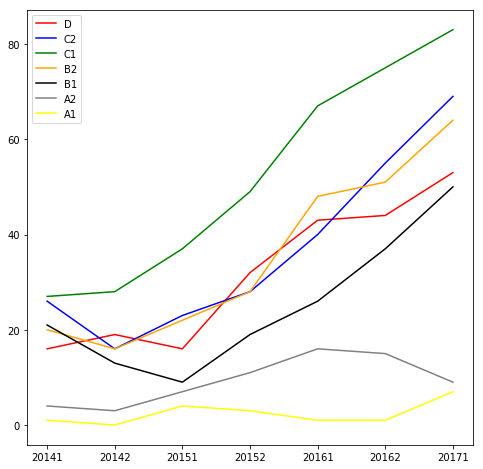

In [237]:
# Geração de gráfico mostrando a quantidade de classes sociais na UFRN com o passar dos anos.

fig, axies12 = plt.subplots(figsize=(8,8))
colors = ['red', 'blue', 'green', 'orange', 'black', 'grey', 'yellow']


for i in range(7):
    start_index = 0;
    end_index = 7;
    subset = classes[start_index:end_index]
    axies12 = plt.plot(subset[classes.columns[i]], c=colors[i])
plt.legend(loc='upper left')

plt.show()


C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


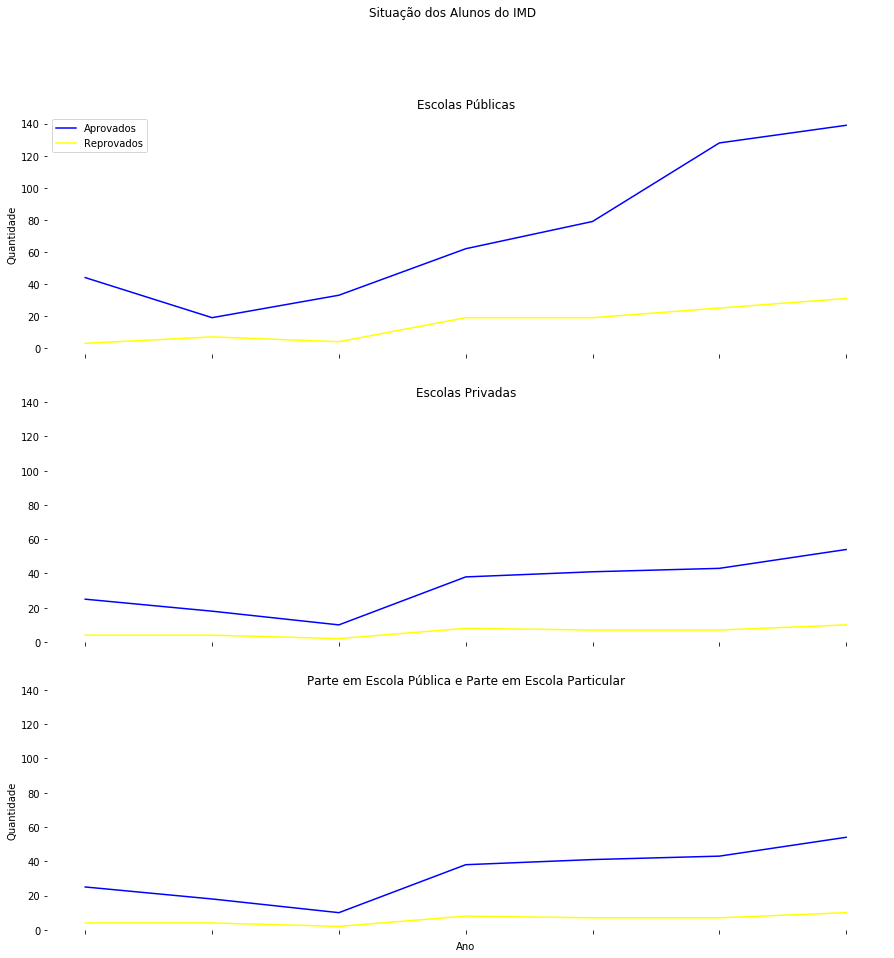

In [252]:
fig_situacao, axies = plt.subplots( ncols=1, nrows=3, figsize=(15,15))

def cleanPosicoes():
    posicoes = ['left','right','bottom', 'top']
    for i in range(0,4):
        ax.spines[posicoes[i]].set_visible(False)

ax = all_public_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=['blue', 'yellow', 'red','grey', 'orange', 'purple', 'green'], 
              title='Escolas Públicas', ax = axies[0])

ax.set_xlabel("")
ax.set_ylabel("Quantidade")
cleanPosicoes()


ax = all_private_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=['blue', 'yellow', 'red', 'purple', 'green'], 
              title='Escolas Privadas', ax = axies[1], legend= False)

ax.set_xlabel("")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = middle_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=['blue', 'yellow', 'red', 'purple', 'green'], 
              title='Parte em Escola Pública e Parte em Escola Particular', ax = axies[2], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()



fig_situacao.suptitle("Situação dos Alunos do IMD")
plt.show()

In [483]:
escola_classe_2016_1

escola_ens_medio Em escola Particular, com bolsa                              \
classe                                          D   C2   C1   B2  B1  A2  A1   
discente                                      1.0  2.0  7.0  1.0 NaN NaN NaN   

escola_ens_medio Outro tipo de escola          ... Todo em escola particular   \
classe                               D  C2  C1 ...                         B1   
discente                           NaN NaN NaN ...                       23.0   

escola_ens_medio          Todo em escola publica                           \
classe             A2  A1                       D    C2    C1    B2    B1   
discente          6.0 NaN                    38.0  41.0  53.0  30.0  14.0   

escola_ens_medio           
classe             A2  A1  
discente          8.0 NaN  

[1 rows x 35 columns]

In [447]:
class_school

,index,Todo em escola publica,Todo em escola privada,Parte em escola pública parte em escola particular,"Em escola Particular, com bolsa",Outro tipo de escola
0,20171,215.0,9.0,12.0,2.0,NaN
1,20161,148.0,4.0,15.0,1.0,NaN
2,20162,184.0,12.0,11.0,1.0,NaN
3,20151,71.0,5.0,6.0,NaN,NaN
4,20152,98.0,6.0,11.0,1.0,NaN
5,20141,58.0,9.0,4.0,NaN,NaN
6,20142,47.0,6.0,4.0,NaN,NaN


C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Período')

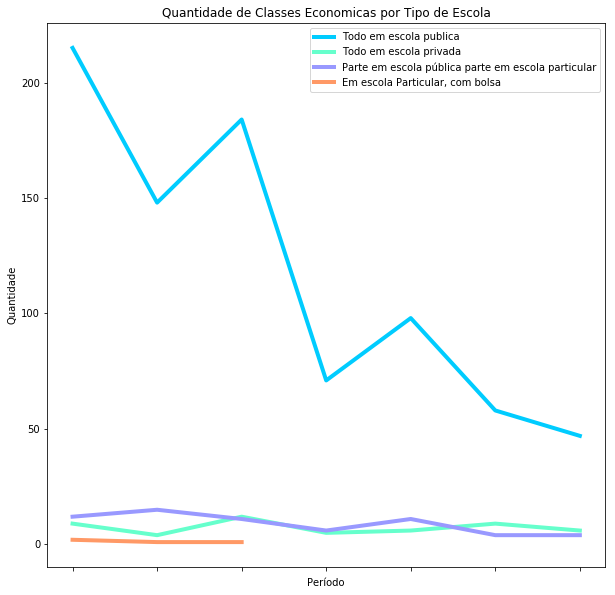

In [469]:
cor1 = (0/255, 204/255, 255/255)
cor2 = (102/255, 255/255, 204/255)
cor3 = (153/255, 153/255, 255/255)
cor4 = (255/255, 153/255, 102/255)
cor5 = (255/255, 102/255, 204/255)

%matplotlib inline
axe = class_school.plot(kind='line',x='index',y=['Todo em escola publica ','Todo em escola privada ','Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa '],
                   title='Quantidade de Classes Economicas por Tipo de Escola',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(10,10), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade')
axe.set_xlabel('Período')
